In [0]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
import numpy as np
import scipy.stats as ss

In [12]:
from google.colab import drive
drive.mount('gdrive', force_remount=True)

Mounted at gdrive


In [0]:
DATA_PATH = r'gdrive/My Drive/Data'
analysis_path = os.path.join(DATA_PATH, 'Tables', 'Analysis.csv')
dive_path = os.path.join(DATA_PATH, 'Tables', 'Dives.csv')

In [0]:
analysis_df = pd.read_csv(analysis_path, index_col=0,
                          dtype={'Count':float})
dive_df = pd.read_csv(dive_path, index_col=0, parse_dates=['Date'])

In [0]:
data_df = pd.merge(analysis_df, dive_df, on='Dive Index', how='outer')

In [16]:
data_df.columns

Index(['Dive Index', 'Quadrat', 'Live Coverage', 'Empty Coverage', 'Biomass',
       'Count', '16mm', '14mm', '12.5mm', '10mm', '8mm', '6.3mm', '4mm', '2mm',
       'Analysis Index', 'Cruise #', 'CSN', 'PSN', 'Date', 'Depth (m)',
       'Overall Coverage', 'Silt (%)', 'Clay (%)', 'Sand (%)', 'Gravel (%)',
       'Cobble (%)', 'Rock (%)', 'Bedrock (%)', 'Boulders (%)', 'Shale (%)',
       'Underlying Substrate Type', 'Underlying Substrate Depth (cm)'],
      dtype='object')

In [17]:
X = data_df[['Silt (%)', 'Clay (%)', 'Sand (%)', 'Gravel (%)',
       'Cobble (%)', 'Rock (%)', 'Bedrock (%)', 'Boulders (%)', 'Shale (%)']]
X = pd.DataFrame(data=X.values/X.sum(axis=1).values.reshape(-1,1), columns=X.columns)
X

,Silt (%),Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%)
0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0
2,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0
3,0.0,0.0,0.0,0.05,0.10,0.80,0.00,0.05,0.0
4,0.0,0.0,0.0,0.05,0.10,0.80,0.00,0.05,0.0
...,...,...,...,...,...,...,...,...,...
1603,0.0,0.0,0.0,0.00,0.10,0.10,0.75,0.05,0.0
1604,0.0,0.0,0.0,0.00,0.10,0.10,0.75,0.05,0.0
1605,0.0,0.0,0.0,0.05,0.05,0.05,0.85,0.00,0.0
1606,0.0,0.0,0.0,0.05,0.05,0.05,0.85,0.00,0.0


In [18]:
Y = data_df[['Live Coverage', 'Empty Coverage', 'Biomass',
       'Count', '16mm', '14mm', '12.5mm', '10mm', '8mm', '6.3mm', '4mm', '2mm']]
Y

,Live Coverage,Empty Coverage,Biomass,Count,16mm,14mm,12.5mm,10mm,8mm,6.3mm,4mm,2mm
0,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,0.0,45.17,132.0,0.007576,0.037879,0.250000,0.045455,0.030303,0.053030,0.234848,0.340909
3,98.0,0.0,345.11,833.0,0.000000,0.004802,0.075630,0.490996,0.181273,0.042017,0.088836,0.116447
4,99.0,0.0,319.84,647.0,0.000000,0.003091,0.091190,0.596600,0.202473,0.034003,0.035549,0.037094
...,...,...,...,...,...,...,...,...,...,...,...,...
1603,50.0,2.0,176.19,376.0,0.000000,0.000000,0.061170,0.441489,0.148936,0.125000,0.170213,0.053191
1604,40.0,5.0,173.68,401.0,0.000000,0.000000,0.059850,0.403990,0.184539,0.152120,0.104738,0.094763
1605,90.0,1.0,263.57,986.0,0.000000,0.000000,0.012170,0.250507,0.209939,0.118661,0.160243,0.248479
1606,70.0,1.0,198.31,745.0,0.000000,0.000000,0.010738,0.276510,0.194631,0.071141,0.095302,0.351678


### Cross-correlation

In [19]:
X.corr()

,Silt (%),Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%)
Silt (%),1.000000,-0.073905,-0.070667,-0.046061,-0.140514,-0.166237,-0.254801,-0.147180,-0.029132
Clay (%),-0.073905,1.000000,-0.120058,-0.079369,-0.080511,-0.151812,-0.272312,-0.144261,-0.030895
Sand (%),-0.070667,-0.120058,1.000000,-0.118910,-0.188461,-0.218662,-0.350787,-0.186514,-0.039704
Gravel (%),-0.046061,-0.079369,-0.118910,1.000000,0.378963,0.097216,-0.327391,-0.017706,-0.035614
Cobble (%),-0.140514,-0.080511,-0.188461,0.378963,1.000000,0.339802,-0.337239,0.061559,-0.035119
Rock (%),-0.166237,-0.151812,-0.218662,0.097216,0.339802,1.000000,-0.328391,0.219401,0.006704
Bedrock (%),-0.254801,-0.272312,-0.350787,-0.327391,-0.337239,-0.328391,1.000000,-0.189783,-0.082362
Boulders (%),-0.147180,-0.144261,-0.186514,-0.017706,0.061559,0.219401,-0.189783,1.000000,-0.026450
Shale (%),-0.029132,-0.030895,-0.039704,-0.035614,-0.035119,0.006704,-0.082362,-0.026450,1.000000


In [20]:
for column in Y.columns:
  y = Y[column]
  y_train = y.dropna()
  X_train = X.loc[y.notnull()]
  X_train['Mussels'] = y_train.values
  print(f"Cross-correlation for {column}:")
  print(X_train.corr()['Mussels'])
  print("")

Cross-correlation for Live Coverage:
Silt (%)       -0.099964
Clay (%)       -0.130990
Sand (%)       -0.337778
Gravel (%)     -0.043943
Cobble (%)      0.083074
Rock (%)        0.237516
Bedrock (%)     0.173425
Boulders (%)    0.261972
Shale (%)      -0.072488
Mussels         1.000000
Name: Mussels, dtype: float64

Cross-correlation for Empty Coverage:
Silt (%)       -0.023564
Clay (%)        0.027247
Sand (%)       -0.130797
Gravel (%)      0.266269
Cobble (%)      0.216883
Rock (%)        0.002054
Bedrock (%)    -0.026213
Boulders (%)   -0.085600
Shale (%)      -0.036565
Mussels         1.000000
Name: Mussels, dtype: float64

Cross-correlation for Biomass:
Silt (%)       -0.068510
Clay (%)       -0.094182
Sand (%)       -0.300327
Gravel (%)     -0.063319
Cobble (%)      0.042954
Rock (%)        0.249742
Bedrock (%)     0.115957
Boulders (%)    0.271517
Shale (%)      -0.048112
Mussels         1.000000
Name: Mussels, dtype: float64

Cross-correlation for Count:
Silt (%)        0.0072

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


### Least-square regression (a.k.a. multiple linear regression)

In [0]:
def train(X, y):
  sol1 = np.linalg.lstsq(X, y) # Solve linear system (least-square solution)
  return sol1[0]

def predict(X, a):
  return X @ a.T

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


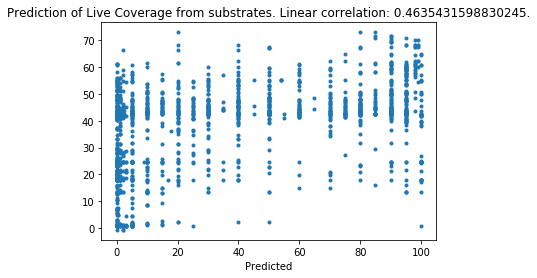

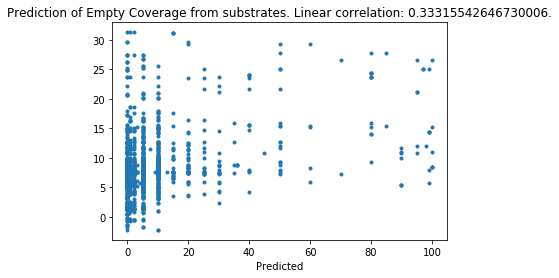

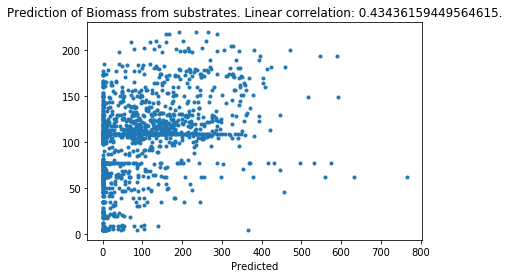

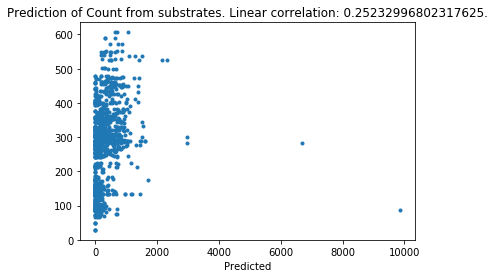

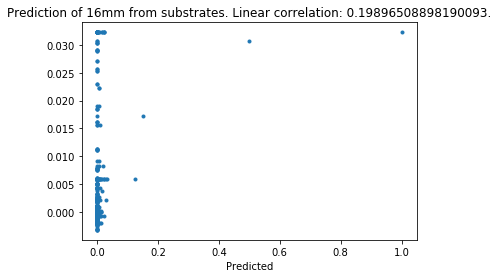

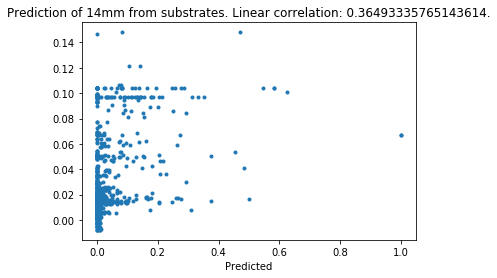

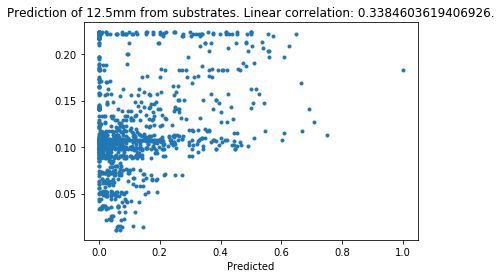

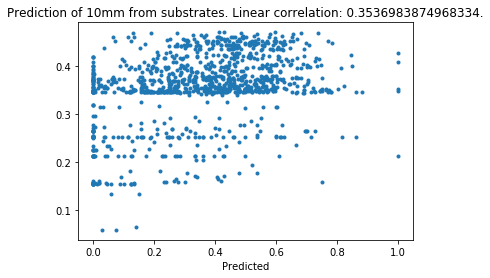

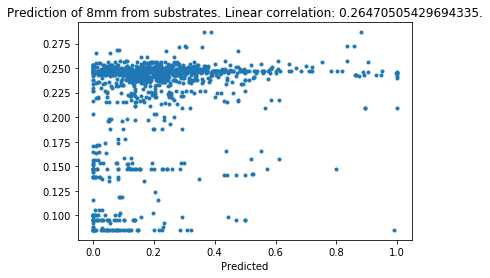

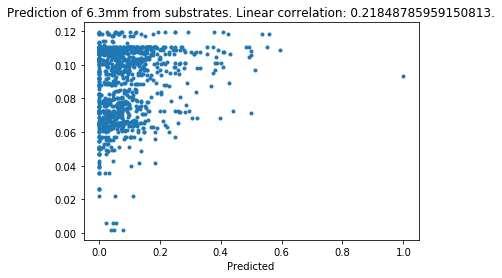

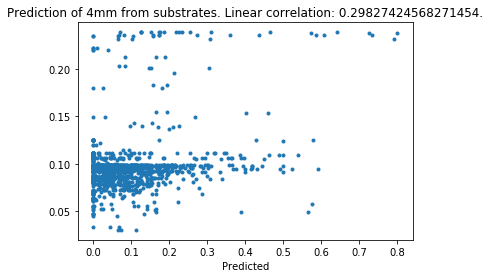

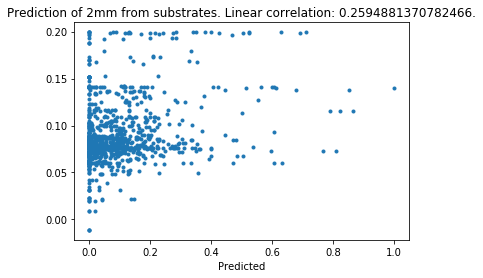

In [22]:
for column in Y.columns:
  y = Y[column]
  y_train = y.dropna().values
  X_train = X.loc[y.notnull()].values
  a = train(X_train, y_train)
  y_pred = predict(X_train, a)
  r = ss.pearsonr(y_train, y_pred)[0]
  plt.plot(y_train, y_pred, '.')
  plt.plot()
  plt.title(f"Prediction of {column} from substrates. Linear correlation: {r}.")
  plt.xlabel("Observed")
  plt.xlabel("Predicted")
  plt.show()

### Hard vs soft substrate

In [23]:
X.columns

Index(['Silt (%)', 'Clay (%)', 'Sand (%)', 'Gravel (%)', 'Cobble (%)',
       'Rock (%)', 'Bedrock (%)', 'Boulders (%)', 'Shale (%)'],
      dtype='object')

In [24]:
coverage_dict = {'Hard':X[['Gravel (%)', 'Cobble (%)',
       'Rock (%)', 'Bedrock (%)', 'Boulders (%)']].sum(axis=1).values,
 'Soft':X[['Silt (%)', 'Clay (%)', 'Sand (%)', 'Shale (%)']].sum(axis=1).values}
Xp = pd.DataFrame(data=coverage_dict)
Xp

,Hard,Soft
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1603,1.0,0.0
1604,1.0,0.0
1605,1.0,0.0
1606,1.0,0.0


In [0]:
Xp['Mussels'] = Y['Live Coverage'].values

In [26]:
Xp.corr()

,Hard,Soft,Mussels
Hard,1.000000,-1.000000,0.395072
Soft,-1.000000,1.000000,-0.395072
Mussels,0.395072,-0.395072,1.000000


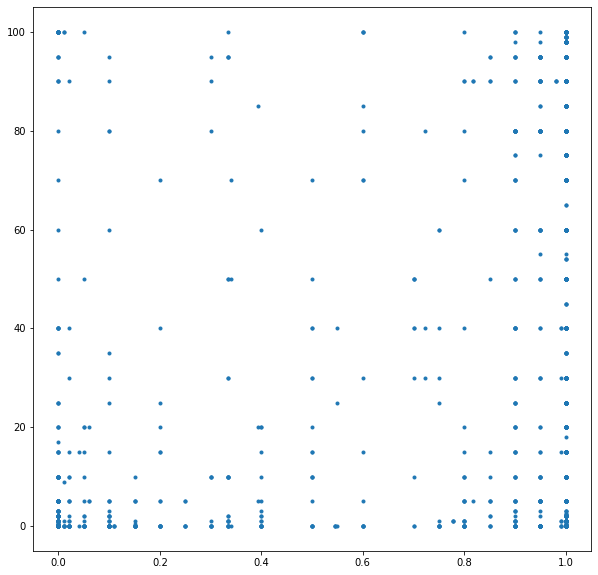

In [27]:
plt.figure(figsize=(10,10))
plt.plot(Xp['Hard'].values, Xp['Mussels'].values, '.')

In [28]:
Xp['Mussels'].groupby(pd.cut(Xp["Hard"], np.arange(-0.05,1.15,0.1))).mean()

Hard
(-0.05, 0.05]    12.775986
(0.05, 0.15]     11.027778
(0.15, 0.25]      9.761905
(0.25, 0.35]     26.128205
(0.35, 0.45]     11.857143
(0.45, 0.55]     17.083333
(0.55, 0.65]     43.666667
(0.65, 0.75]     26.500000
(0.75, 0.85]     21.583333
(0.85, 0.95]     41.354610
(0.95, 1.05]     47.943850
Name: Mussels, dtype: float64

### By month

In [29]:
X1 = X.loc[Y['Biomass'].notnull()]
X1

,Silt (%),Clay (%),Sand (%),Gravel (%),Cobble (%),Rock (%),Bedrock (%),Boulders (%),Shale (%)
0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0
2,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0
3,0.0,0.0,0.0,0.05,0.10,0.80,0.00,0.05,0.0
4,0.0,0.0,0.0,0.05,0.10,0.80,0.00,0.05,0.0
...,...,...,...,...,...,...,...,...,...
1603,0.0,0.0,0.0,0.00,0.10,0.10,0.75,0.05,0.0
1604,0.0,0.0,0.0,0.00,0.10,0.10,0.75,0.05,0.0
1605,0.0,0.0,0.0,0.05,0.05,0.05,0.85,0.00,0.0
1606,0.0,0.0,0.0,0.05,0.05,0.05,0.85,0.00,0.0


In [30]:
X1['Month'] = data_df.loc[Y['Biomass'].notnull(),'Date'].dt.month
X1['Mussels'] = Y['Biomass'].dropna()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


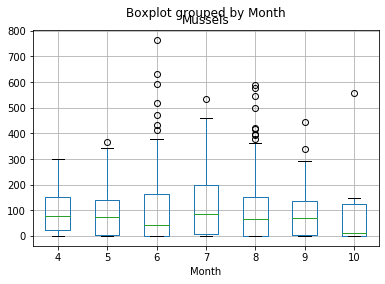

In [31]:
X1.boxplot(by='Month', column='Mussels')

Largest potential biomass (95-th percentile) in July, first increases from April to July, then decreases until October

# Count vs Biomass

In [0]:
x = Y['Count']
y = Y['Biomass']
valid = np.logical_and(x>0, y>0)
y1 = y[valid].values.reshape(-1,1)
x1 = x[valid].values.reshape(-1,1)
x0 = np.ones(x1.shape)

In [0]:
y = np.log(y1)
x = np.log(x1)

In [0]:
X = np.array([x0,x])
X = X.T.reshape(-1,2)

In [151]:
sol,res,r,s = np.linalg.lstsq(X, y)
a = np.exp(sol[0])
b = sol[1]
print(f"Linear regression coefficients (ax**b): a:{a[0]:0.3}, b:{b[0]:0.3}")

Linear regression coefficients (ax**b): a:0.637, b:0.908


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [175]:
std = np.sqrt(res[0]/len(x))
print(f"Multiplicative error factor: [{np.exp(-1.96*std):3.3},{np.exp(1.96*std):3.3}]")

Multiplicative error factor: [0.299,3.34]


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1085: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(left, right)


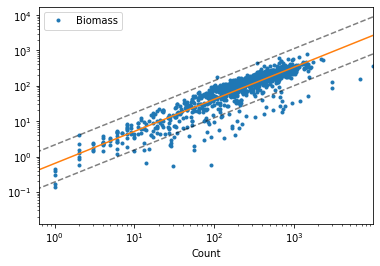

In [176]:
fig = plt.figure()
ax = plt.gca()
Y.plot(ax=ax, x='Count', y='Biomass', style='.', loglog=True)
x_ = np.logspace(-1, 4, 100)
ax.plot(x_, a*x_**b, '-')
ax.plot(x_, np.exp(1.96*std)*a*x_**b, '--', color='k', alpha=0.5)
ax.plot(x_, np.exp(-1.96*std)*a*x_**b, '--', color='k', alpha=0.5)

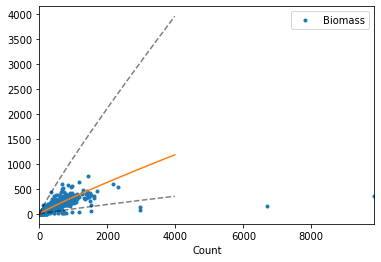

In [177]:
fig = plt.figure()
ax = plt.gca()
Y.plot(ax=ax, x='Count', y='Biomass', style='.')
x_ = np.logspace(-1, 3.6, 100)
ax.plot(x_, a*x_**b, '-')
ax.plot(x_, np.exp(1.96*std)*a*x_**b, '--', color='k', alpha=0.5)
ax.plot(x_, np.exp(-1.96*std)*a*x_**b, '--', color='k', alpha=0.5)